In [1]:
from typing import TypedDict, Literal

from pygments.styles.dracula import green


class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    target_currency: Literal["EUR", "USD"]
    total: float

In [5]:
def calc_total(state: PortfolioState) -> PortfolioState:
    state["total_usd"] = state["amount_usd"] * 1.08
    return state


def convert_to_pkr(state: PortfolioState) -> PortfolioState:
    state["total"] = state["total_usd"] * 240
    return state


def convert_to_eur(state: PortfolioState) -> PortfolioState:
    state["total"] = state["total_usd"] * 1.08
    return state


def choose_conversion(state: PortfolioState) -> str:
    return state["target_currency"]

In [7]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

builder.add_node("calc_total_node", calc_total)
builder.add_node("convert_to_pkr_node", convert_to_pkr)
builder.add_node("convert_to_eur_node", convert_to_eur)

builder.add_edge(START, "calc_total_node")
builder.add_conditional_edges(
    "calc_total_node",
    choose_conversion,
    {
        "EUR": "convert_to_eur_node",
        "PKR": "convert_to_pkr_node"
    }
)

builder.add_edge(["convert_to_eur_node", "convert_to_pkr_node"], END)
graph = builder.compile()

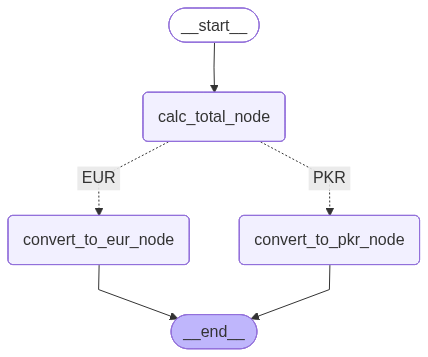

In [10]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [11]:
graph.invoke({"amount_usd": 1000, "target_currency": "PKR"})

{'amount_usd': 1000,
 'total_usd': 1080.0,
 'target_currency': 'PKR',
 'total': 259200.0}